# IMDb Ratings Prediction Project

## Overview
This project explores the prediction of IMDb movie ratings using various machine learning models, including Linear Regression, K-Nearest Neighbors (KNN), and Decision Trees. The dataset includes key movie attributes, such as director ratings, runtime, voting trends, and genre information, which are engineered into meaningful features for analysis.

#### Objectives:

- Predict IMDb Ratings: Develop models to predict movie ratings, starting with regression for continuous predictions and extending to classification for binned ratings.
- Compare Model Performance: Evaluate and compare the effectiveness of different algorithms using metrics such as R², RMSE, accuracy, and cross-validation scores.
- Feature Insights: Identify the most influential features driving IMDb ratings and provide interpretable insights into their impact.

#### Project Flow:

- Data Preprocessing: Clean and prepare the dataset, including handling missing values, creating new features, and encoding categorical data.
- Exploratory Data Analysis (EDA): Visualize relationships between features and ratings to inform model design.
- Modeling: Implement, tune, and evaluate machine learning models, comparing their performance and stability.
- Conclusions: Summarize findings, highlight key insights, and discuss potential applications of the models.

In [3]:
# Importing libraries for data manipulation, visualization, and machine learning
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_error as root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [5]:
# Define the folder path where all the dataset files are stored
folder_path = './Capstone Datasets/'

In [7]:
# Load and concatenate all dataset files into a single DataFrame
moviedata = []

# Loop through all files in the dataset folder
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path): 
        csv_file_name = file
        df = pd.read_csv(file_path)
        df['CSV Data Source'] = csv_file_name
        moviedata.append(df)

# Combine all individual DataFrames into a single DataFrame
movies = pd.concat(moviedata, ignore_index=True)

In [11]:
# Display a summary of the dataset
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368300 entries, 0 to 368299
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         368300 non-null  object 
 1   movie_name       368296 non-null  object 
 2   year             315052 non-null  object 
 3   certificate      104191 non-null  object 
 4   runtime          259146 non-null  object 
 5   genre            368300 non-null  object 
 6   rating           230938 non-null  float64
 7   description      368300 non-null  object 
 8   director         340931 non-null  object 
 9   director_id      340931 non-null  object 
 10  star             309605 non-null  object 
 11  star_id          316442 non-null  object 
 12  votes            230942 non-null  float64
 13  gross(in $)      25039 non-null   float64
 14  CSV Data Source  368300 non-null  object 
dtypes: float64(3), object(12)
memory usage: 42.1+ MB
None


#### Dataset Insights:
Total Entries: 368,300 rows across 15 columns.
#### Key Columns:
- movie_id, movie_name, and genre are fully populated.
- Critical columns like year, runtime, rating, and votes contain missing values that will require handling.
- Financial data (gross(in $)) is especially sparse, with only ~25,000 non-null entries.
  
#### Data Types:
- Most columns are object types, requiring conversion for numerical analysis (e.g., runtime and year).
- Columns like rating, votes, and gross(in $) are numeric (float64), suitable for regression tasks.

In [20]:
# Retain only rows where the 'rating' column is not null
# 'rating' is the target variable for prediction, so missing values in this column are excluded
ratingsData = movies.dropna(subset=(['rating']))

In [22]:
# Preview the first five rows of the filtered dataset to confirm the structure
ratingsData.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),CSV Data Source
1,tt11564570,Glass Onion,2022,PG-13,139 min,"Comedy, Crime, Drama",7.2,Famed Southern detective Benoit Blanc travels ...,Rian Johnson,/name/nm0426059/,"Daniel Craig, \nEdward Norton, \nKate Hudson, ...","/name/nm0185819/,/name/nm0001570/,/name/nm0005...",333315.0,NaN,crime.csv
2,tt10365998,Infinity Pool,2023,R,117 min,"Crime, Horror, Mystery",6.5,James and Em Foster are enjoying an all-inclus...,Brandon Cronenberg,/name/nm0188722/,"Alexander Skarsgård, \nMia Goth, \nCleopatra C...","/name/nm0002907/,/name/nm5301405/,/name/nm1671...",6955.0,NaN,crime.csv
3,tt14138650,The Pale Blue Eye,2022,R,128 min,"Crime, Horror, Mystery",6.6,A world-weary detective is hired to investigat...,Scott Cooper,/name/nm0178376/,"Christian Bale, \nHarry Melling, \nSimon McBur...","/name/nm0000288/,/name/nm0577982/,/name/nm0564...",85087.0,NaN,crime.csv
4,tt15789492,Infiesto,2023,TV-MA,96 min,"Crime, Drama, Thriller",5.5,Two detectives are called to a small mining to...,Patxi Amezcua,/name/nm0025538/,"Isak Férriz, \nIria del Río, \nAntonio Buíl, \...","/name/nm1929945/,/name/nm4170579/,/name/nm0125...",2081.0,NaN,crime.csv
5,tt1877830,The Batman,2022,PG-13,176 min,"Action, Crime, Drama",7.8,When a sadistic serial killer begins murdering...,Matt Reeves,/name/nm0716257/,"Robert Pattinson, \nZoë Kravitz, \nJeffrey Wri...","/name/nm1500155/,/name/nm2368789/,/name/nm0942...",672146.0,NaN,crime.csv


In [26]:
# Display information about the filtered dataset
# - This shows the reduced dataset size and highlights the remaining missing values in other columns
print(ratingsData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 230938 entries, 1 to 368282
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         230938 non-null  object 
 1   movie_name       230938 non-null  object 
 2   year             230918 non-null  object 
 3   certificate      100110 non-null  object 
 4   runtime          215351 non-null  object 
 5   genre            230938 non-null  object 
 6   rating           230938 non-null  float64
 7   description      230938 non-null  object 
 8   director         230670 non-null  object 
 9   director_id      230670 non-null  object 
 10  star             228474 non-null  object 
 11  star_id          229489 non-null  object 
 12  votes            230938 non-null  float64
 13  gross(in $)      25039 non-null   float64
 14  CSV Data Source  230938 non-null  object 
dtypes: float64(3), object(12)
memory usage: 28.2+ MB
None


#### Filtered Dataset Size:
- Reduced from 368,300 rows to 230,938 rows (only rows with non-null rating values remain).
  
#### Remaining Missing Values:
- certificate (100,110 non-null) and runtime (215,351 non-null) still have missing values.
- gross(in $) remains highly sparse with only 25,039 non-null entries.
  
#### Impact on Memory:
- The memory usage of the dataset is now approximately 28.2 MB, reduced from the original 42.1+ MB.

### Feature Engineering

In [246]:
# FEATURE ENGINEERING

# 1. Filling missing certificates
# Missing values in the 'certificate' column are replaced with 'Unknown' to preserve data.
ratingsData['certificate'] = ratingsData['certificate'].fillna('Unknown')

# 2. Creating a description length feature
# This calculates the length of the movie description to use as a potential predictor.
ratingsData['description_length'] = ratingsData['description'].str.len()

# 3. Director-specific features
# Total number of movies directed by each director
director_counts = ratingsData['director'].value_counts()
ratingsData['director_movie_count'] = ratingsData['director'].map(director_counts)

# Average rating of movies directed by each director
director_mean_ratings = ratingsData.groupby('director')['rating'].mean()
ratingsData['director_avg_rating'] = ratingsData['director'].map(director_mean_ratings)

# 4. Dropping missing values in critical columns
# Rows with missing 'runtime', 'director', or 'year' are removed to ensure data completeness.
ratingsData = ratingsData.dropna(subset=['runtime'])
ratingsData = ratingsData.dropna(subset=['director'])
ratingsData = ratingsData.dropna(subset=['year'])

# 5. Converting 'runtime' and 'year' to numeric values
# Extract numeric values from the 'runtime' column
ratingsData['runtime'] = ratingsData['runtime'].astype(str)
ratingsData['runtime'] = ratingsData['runtime'].str.extract(r'(\d+)').astype(float)

# Handle non-numeric values in the 'year' column and convert it to integers
ratingsData['year'] = ratingsData['year'].astype(str)
non_numeric_years = ratingsData[~ratingsData['year'].str.match(r'^\d{4}$', na=False)]
ratingsData['year'] = ratingsData['year'].apply(lambda x: x if x.isdigit() and len(x) == 4 else None)
ratingsData = ratingsData.dropna(subset=['year'])
ratingsData['year'] = pd.to_numeric(ratingsData['year'], errors='coerce')

# 6. Encoding genres using one-hot encoding
# The 'CSV Data Source' column is one-hot encoded to provide genre information in numeric format.
csv_genre_encoded = pd.get_dummies(ratingsData['CSV Data Source'], prefix='genre')
ratingsData = pd.concat([ratingsData, csv_genre_encoded], axis=1)

# 7. Year-based statistics
# Calculate the number of movies released in the same year
movie_count_by_year = ratingsData['year'].value_counts()
ratingsData['movies_released_sameyear'] = ratingsData['year'].map(movie_count_by_year)

# Calculate the average rating of movies released in the same year
avg_rating_by_year = ratingsData.groupby('year')['rating'].mean()
ratingsData['avg_movierating_sameyear'] = ratingsData['year'].map(avg_rating_by_year)



### Feature Relationship Visualization: Runtime vs. Rating
- With this plot below we aim to uncover any trends or correlations that might exist

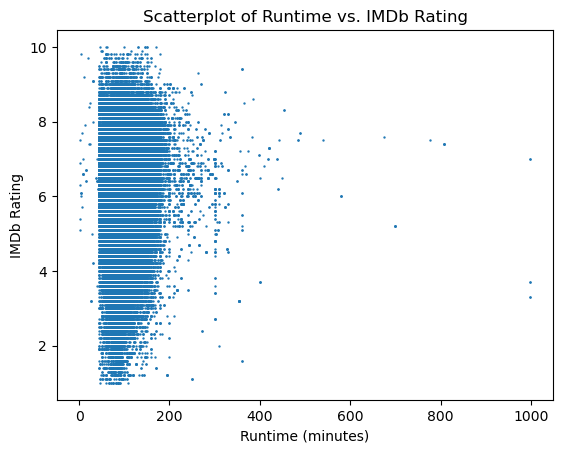

In [44]:
# Scatterplot for visualizing the relationship between runtime and rating
plt.scatter(ratingsData["runtime"], ratingsData["rating"], s=.5) 

# Add labels and title for clarity
plt.title("Scatterplot of Runtime vs. IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Rating")
plt.show()

#### Observations from the Plot
- Concentration: Most movies have a runtime below 200 minutes, with a dense cluster around 100–150 minutes.
- Ratings Distribution: Ratings predominantly fall between 4 and 8, regardless of runtime.
- Outliers: There are a few movies with runtimes exceeding 400 minutes, but their ratings don’t show a consistent trend.
- Weak Correlation: There doesn’t appear to be a strong direct relationship between runtime and rating.

### Correlation Heatmap of Features

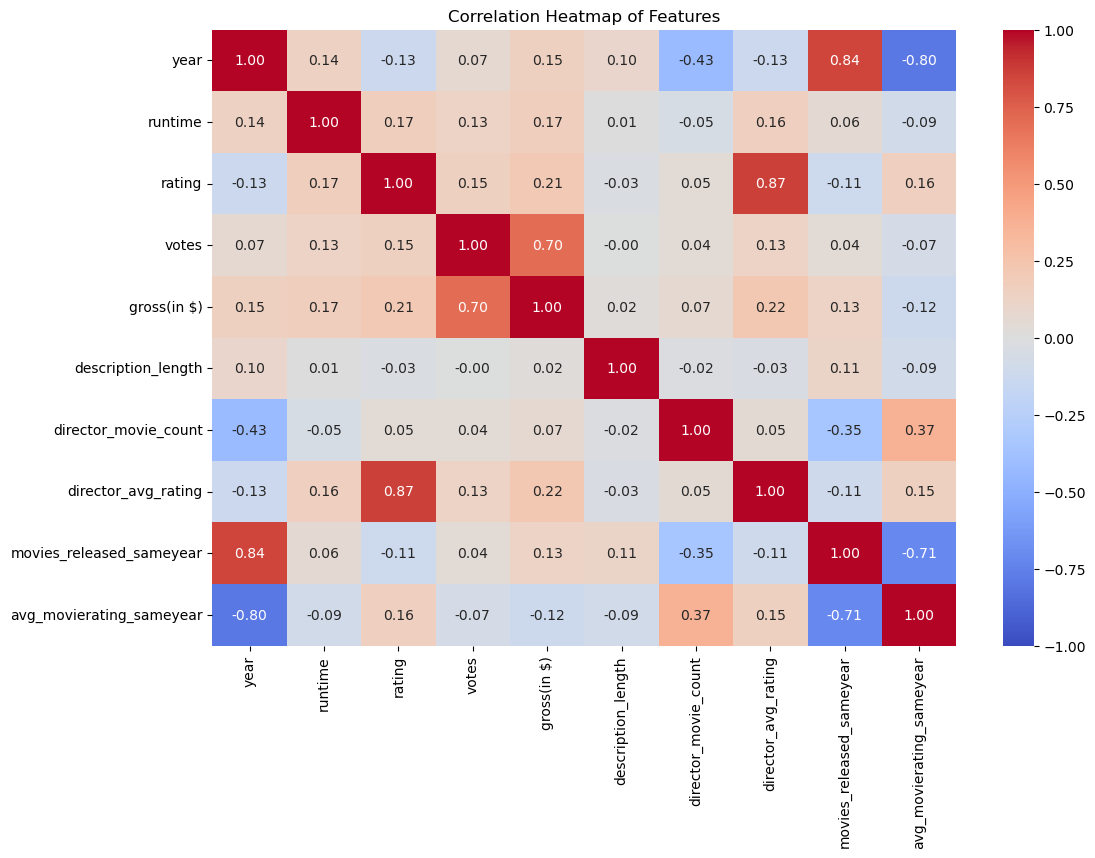

In [52]:
# Finding the correlation between numerical features in the dataset
correlation_matrix = ratingsData.select_dtypes(include=['number']).corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show() 

#### Observations

Strong Positive Correlations:
- director_avg_rating has the strongest positive correlation with rating (0.87), making it a key predictor.
- votes and avg_movierating_sameyear have moderate positive correlations with rating (0.21 and 0.16, respectively).
- runtime has a weaker but still positive correlation (0.17).

Weak or Negligible Correlations:
- Features like description_length and gross(in $) have weak or insignificant correlations with rating, suggesting limited individual predictive power.

Notable Trends:
- movies_released_sameyear has a strong positive correlation with year (0.84) but a strong negative correlation with avg_movierating_sameyear (-0.71), indicating potential multicollinearity.
- avg_movierating_sameyear shows some positive correlation with rating but has a strong inverse relationship with year (-0.80), likely reflecting historical trends in ratings.

Insights for Model Building:
- Prioritize director_avg_rating, votes, and avg_movierating_sameyear as predictive features for rating.
- runtime might contribute incrementally when combined with other features, despite its weaker correlation.

### Genre Correlation with IMDb Ratings

In [56]:
# Assessing the correlation between genre columns and IMDb ratings
# Select columns related to genres (identified by the 'genre_' prefix)
genre_cols = [col for col in ratingsData.columns if col.startswith('genre_')]
genre_correlations = ratingsData[genre_cols + ['rating']].corr()['rating'].sort_values(ascending=False)

# Display the correlations
print(genre_correlations)

rating               1.000000
genre_romance.csv    0.094678
genre_romance.csv    0.094678
genre_romance.csv    0.094678
genre_romance.csv    0.094678
                       ...   
genre_horror.csv    -0.206176
genre_horror.csv    -0.206176
genre_horror.csv    -0.206176
genre_horror.csv    -0.206176
genre_horror.csv    -0.206176
Name: rating, Length: 145, dtype: float64


#### Observations

Strongest Correlations:
- The genre_romance.csv column shows the highest positive correlation (~0.09) with rating. While weak, this suggests that romance movies tend to receive slightly higher ratings on average.

Negative Correlations:
- The genre_horror.csv column has the strongest negative correlation (~ -0.21) with rating. This indicates that horror movies tend to receive lower ratings compared to other genres.

Implications for Modeling:
- While genre correlations are relatively weak, they could still contribute incremental predictive power when combined with other features like director_avg_rating and votes.

### Ratings by Genre Visualization

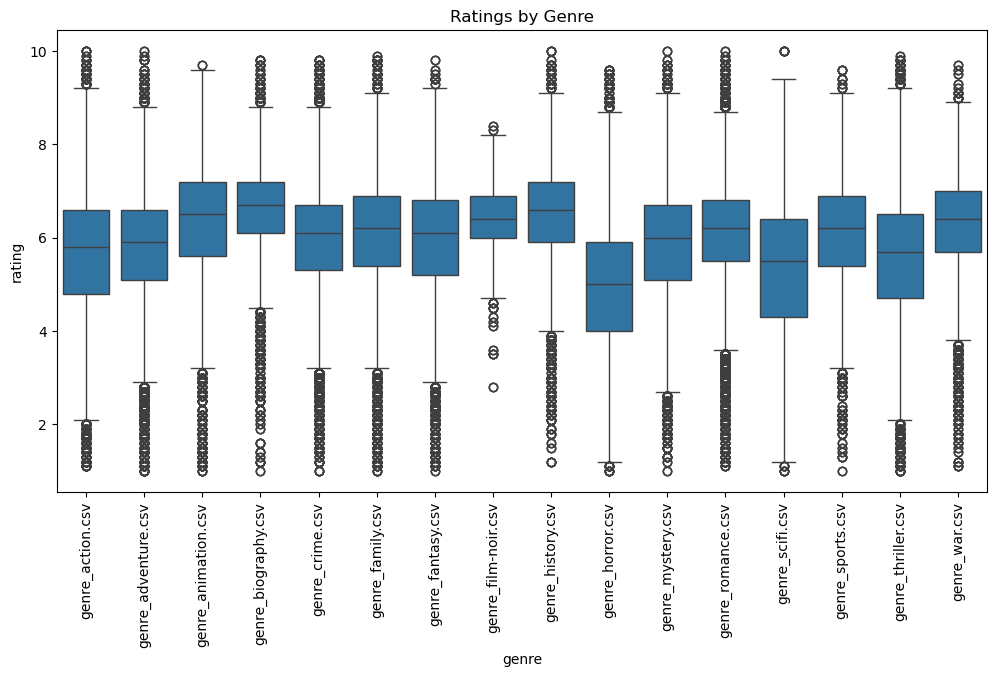

In [61]:
#Visualize Genre Ratings on Boxplot
genre_ratings = ratingsData.melt(
    id_vars='rating',
    value_vars=genre_cols,
    var_name='genre',
    value_name='is_genre'
)
genre_ratings = genre_ratings[genre_ratings['is_genre'] == True]

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='rating', data=genre_ratings)
plt.xticks(rotation=90)
plt.title('Ratings by Genre')
plt.show()


#### Observations
- Some genres (e.g., film-noir and war) have higher median ratings, while genres like horror show lower medians and greater variability.
- Genre distributions provide some insight into general trends but might require further aggregation for predictive use.

## Linear Regression Model

In [64]:
# Defining key features for the linear regression model
key_features = ['director_avg_rating', 'avg_movierating_sameyear', 'votes', 'runtime']
genre_cols = [col for col in ratingsData.columns if col.startswith('genre_')]

# Combine selected features for the input (X) and use 'rating' as the target variable (y)
X = ratingsData[key_features + genre_cols]
y = ratingsData['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Instantiate the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [70]:
#Train/Test results
r2_train = lr.score(X_train,y_train)
r2_test = lr.score(X_test, y_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Training R²: {r2_train:.4f}')
print(f'Test R²: {r2_test:.4f}')
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Test RMSE: {rmse_test:.4f}')

Training R²: 0.7562
Test R²: 0.7532
Training RMSE: 0.6463
Test RMSE: 0.6502


#### Metrics:
- Training R²: 0.7562 – The model explains ~75.6% of the variance in the training data.
- Test R²: 0.7532 – The model explains ~75.3% of the variance in the test data, indicating good generalization.
- Training RMSE: 0.6463 – The average error in the training predictions is 0.65 (on a 1–10 scale).
- Test RMSE: 0.6502 – The error on the test predictions is very similar, showing a consistent performance.
  
#### Model Evaluation:
- The small difference between training and testing metrics indicates that the model generalizes well without overfitting.
- The R² values suggest the features are strong predictors of IMDb ratings, while the RMSE highlights that the model has a reasonably low error rate.

### Feature Analysis

In [73]:
#InitialCoeficient Analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                     Feature  Coefficient
0        director_avg_rating     0.971022
1   avg_movierating_sameyear     0.185410
27       genre_film-noir.csv     0.016433
26       genre_film-noir.csv     0.016433
25       genre_film-noir.csv     0.016433
..                       ...          ...
41           genre_scifi.csv    -0.016135
42           genre_scifi.csv    -0.016135
90           genre_scifi.csv    -0.016135
89           genre_scifi.csv    -0.016135
88           genre_scifi.csv    -0.016135

[148 rows x 2 columns]


#### Top Predictors:
- director_avg_rating has the highest positive coefficient (0.971), making it the most influential feature in predicting IMDb ratings.
- avg_movierating_sameyear also has a positive impact (0.185), showing its incremental predictive power.

#### Low-Impact Features:
- genre columns like genre_film-noir.csv and genre_scifi.csv have very small coefficients, suggesting their limited individual influence.

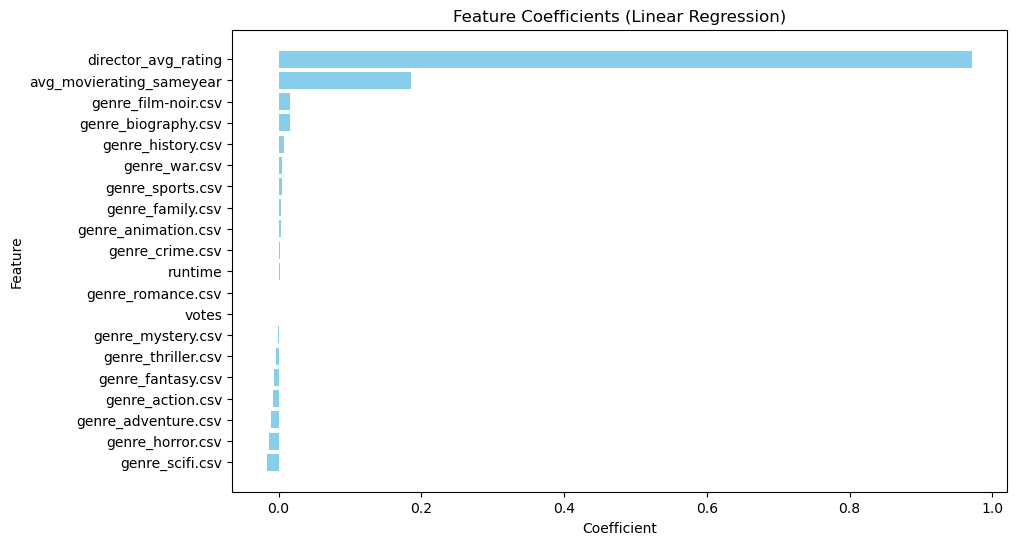

In [76]:
#Feature Coeficient Visualization
plt.figure(figsize=(10, 6))
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=True)
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Coefficient'], color='skyblue')
plt.title('Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [80]:
#Log of Votes could be a Potential better indicator than a very right skewed votes
# Log transformation
ratingsData['log_votes'] = np.log1p(ratingsData['votes'])

# Correlation with rating
corr_votes = ratingsData['votes'].corr(ratingsData['rating'])
corr_log_votes = ratingsData['log_votes'].corr(ratingsData['rating'])

print(f"Correlation with rating (Votes): {corr_votes:.4f}")
print(f"Correlation with rating (Log Votes): {corr_log_votes:.4f}")
#not really

Correlation with rating (Votes): 0.1531
Correlation with rating (Log Votes): 0.0865


#### Correlation Comparison:
- votes has a weak positive correlation with rating (0.1531), suggesting a slight relationship between the two.
- log_votes has an even weaker correlation (0.0865), indicating the log transformation does not improve the relationship in this case.
- While log transformation is often used to handle skewed distributions, it does not seem to improve the correlation with rating in this dataset.

### 5-Fold Cross-Validation for Linear Regression

In [84]:
#5-fold cross-validation for R²
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
rmse_scores = cross_val_score(lr, X, y, cv=5, scoring=make_scorer(root_mean_squared_error))
print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())
print("Standard Deviation of R²:", cv_scores.std())
print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

Cross-validated R² scores: [0.76311877 0.64793171 0.76621802 0.76119343 0.76337652]
Mean R²: 0.7403676879165584
Standard Deviation of R²: 0.04624582067211648
Cross-validated RMSE scores: [0.43481708 0.43239393 0.37401559 0.44599476 0.42836225]
Mean RMSE: 0.42311672321990856
Standard Deviation of RMSE: 0.025238090821246603


#### Cross-Validated R²:
- Scores range between 0.6479 and 0.7662, indicating variability in model performance across folds.
- The mean R² score is 0.7404, suggesting the model explains ~74% of variance on average.
- A standard deviation of 0.0462 shows moderate consistency across folds.
  
#### Cross-Validated RMSE:
- Scores range between 0.3740 and 0.4460, with an average RMSE of 0.4231.
- The standard deviation of RMSE (0.0252) indicates relatively stable error performance across folds.

#### Model Evaluation:
- The cross-validated metrics closely align with the training and testing metrics observed earlier, reinforcing that the linear regression model performs reliably across different data splits.

### Actual vs. Predicted Ratings: Scatter Plot

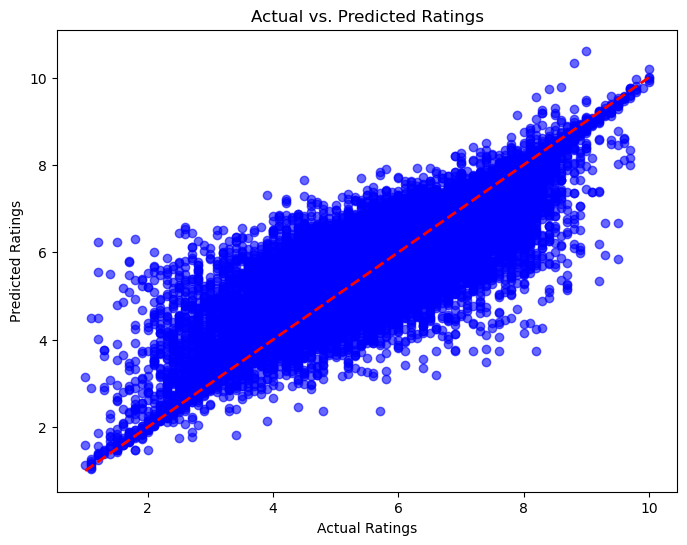

In [87]:
#Actual v. Predicted Ratings Scatter Plot: How the model aligns with actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

### Residuals Distribution

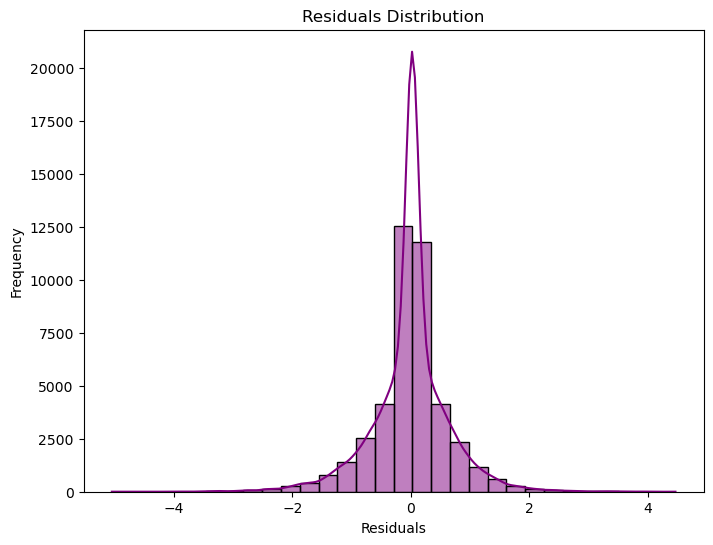

In [92]:
#Residual Plot: Shows the prediction errors to confirm even spread
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Conclusion for Linear Regression Model

The linear regression model performs well, explaining ~75% of the variance in IMDb ratings, with consistent R² and RMSE values across training and testing datasets. The scatter plot shows strong alignment between actual and predicted ratings, particularly for mid-range values, though there is some deviation for extremes. Residuals are normally distributed around 0, confirming no major prediction bias. Key predictors, such as director_avg_rating and avg_movierating_sameyear, significantly contribute to the model, while genres have minimal impact. Overall, this model is a solid baseline, with opportunities for refinement in handling extreme ratings and exploring more complex relationships.

## KNN Model

In [101]:
# Classification: Grouping ratings by rounding to the nearest integer
# Round the 'rating' column to the nearest integer and store it in a new column
ratingsData['grouped_rating'] = ratingsData['rating'].round()

# Convert the rounded ratings into a categorical data type
ratingsData['grouped_rating'] = ratingsData['grouped_rating'].astype('category')

# Display the first 20 rows of the original and grouped ratings
print(ratingsData[['rating', 'grouped_rating']].head(20))

    rating grouped_rating
1      7.2            7.0
2      6.5            6.0
3      6.6            7.0
4      5.5            6.0
5      7.8            8.0
6      9.2            9.0
7      7.9            8.0
8      7.1            7.0
9      8.2            8.0
10     7.0            7.0
11     8.9            9.0
13     9.0            9.0
14     7.6            8.0
16     7.3            7.0
17     4.8            5.0
18     7.2            7.0
21     7.4            7.0
22     7.8            8.0
23     5.2            5.0
24     6.7            7.0


In [109]:
# Create feature matrix (X) and target vector (y)
feature_cols = ['director_avg_rating', 'avg_movierating_sameyear', 'votes', 'runtime']
X = ratingsData[feature_cols]
y = ratingsData['grouped_rating']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# Standardizing Features: Scale features to have mean=0 and std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Calculating Training and Testing Error for KNN
- This loop calculates training and testing errors for k values ranging from 1 to 100.

In [111]:
#Calculate Training/Testing Error
k_range = list(range(1, 101))
training_error = []
testing_error = []

for k in k_range:
    if k % 10 == 0:
        print(f"Processing k={k}...")
   
    # Instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Calculate training error (error = 1 - accuracy)
    y_pred_class = knn.predict(X_train_scaled)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test_scaled)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
ratingsData.info()

Processing k=10...
Processing k=20...
Processing k=30...
Processing k=40...
Processing k=50...
Processing k=60...
Processing k=70...
Processing k=80...
Processing k=90...
Processing k=100...
<class 'pandas.core.frame.DataFrame'>
Index: 215166 entries, 1 to 368282
Data columns (total 70 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   movie_id                  215166 non-null  object  
 1   movie_name                215166 non-null  object  
 2   year                      215166 non-null  int64   
 3   certificate               215166 non-null  object  
 4   runtime                   215166 non-null  float64 
 5   genre                     215166 non-null  object  
 6   rating                    215166 non-null  float64 
 7   description               215166 non-null  object  
 8   director                  215166 non-null  object  
 9   director_id               215166 non-null  object  
 10  star          

### Error vs. K Value Visualization

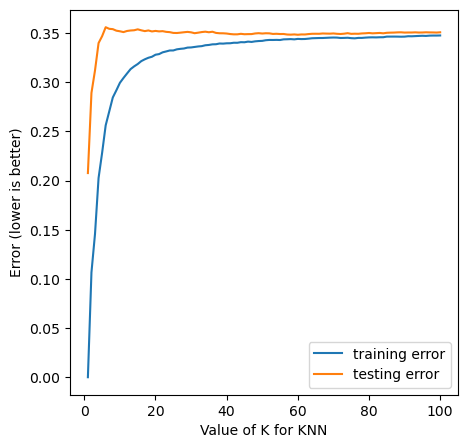

In [114]:
df.plot(figsize=(5,5));
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [116]:
df.sort_values('testing error').head(20)

,training error,testing error
K,,
1,0.000143,0.207670
2,0.106640,0.289132
3,0.145810,0.312017
4,0.202660,0.339827
5,0.228277,0.346836
60,0.344058,0.348267
58,0.343853,0.348379
57,0.343692,0.348509
62,0.343959,0.348546


In [118]:
df.sort_values('training error').head(20)

,training error,testing error
K,,
1,0.000143,0.207670
2,0.106640,0.289132
3,0.145810,0.312017
4,0.202660,0.339827
5,0.228277,0.346836
6,0.256187,0.355927
7,0.270310,0.354309
8,0.284501,0.353975
9,0.291782,0.352413


#### Training Error:
- very low with very small values of K, indicating better fit to the training data (but risks overfitting).

#### Testing Error:
- decreases as K increases after K=6 , stabilizing around an optimal range.

#### Optimal K:
- Testing error is minimized around K = 31, balancing model accuracy and generalization.

In [121]:
#Instantiate the final model with K=31
knn_final = KNeighborsClassifier(n_neighbors=31)
knn_final.fit(X_scaled, y)

accuracy = knn_final.score(X_scaled, y)
print(f"Final Model Accuracy on All Data: {accuracy:.4f}")

#The final KNN model achieves an accuracy of 66.7% on the full dataset, showing reasonable performance for predicting IMDb rating groups

Final Model Accuracy on All Data: 0.6670


### Cross-Validation for KNN Model

In [123]:
# Cross-validate
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV accuracy: {cv_scores.std():.4f}")

Cross-validated accuracy scores: [0.64379328 0.62879651 0.6700904  0.63897474 0.66228243]
Mean CV accuracy: 0.6488
Standard deviation of CV accuracy: 0.0152


#### Cross-Validation Accuracy:
- Accuracy scores range from 62.88% to 67.01% across folds.
- The mean accuracy of 64.88% aligns closely with the model's accuracy on the full dataset (66.7%).
    
#### Model Stability:
- The low standard deviation (0.0152) indicates consistent performance across different folds, reinforcing the model’s reliability.

In [126]:
# Calculate the number of misclassified predictions
y_pred = knn_final.predict(X_scaled)
misclassified = (y != y_pred).sum()
total_predictions = len(y)

# Print the results
print(f"Number of misclassified predictions = {misclassified}/{total_predictions}")


Number of misclassified predictions = 71647/215166


### KNN Visualizations

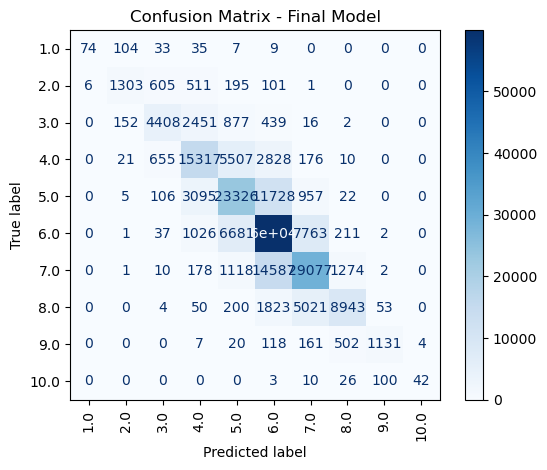

In [128]:
#Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - Final Model")
plt.show()

Number of misclassified instances: 71647/215166


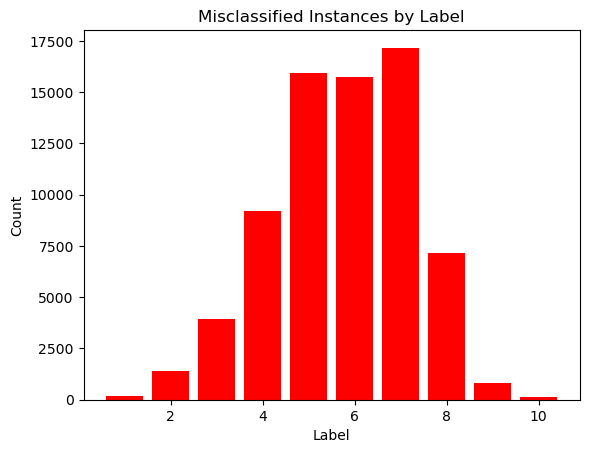

In [130]:
# Bar Chart To Identify misclassified instances
misclassified = y != y_pred

# Count the number of misclassified instances
num_misclassified = misclassified.sum()
total_instances = len(y)

print(f"Number of misclassified instances: {num_misclassified}/{total_instances}")

# Bar plot of misclassified counts per label
misclassified_counts = pd.Series(y[misclassified]).value_counts()
plt.bar(misclassified_counts.index, misclassified_counts.values, color="red")
plt.title("Misclassified Instances by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()



### Conclusion for KNN Model

The KNN model achieves a cross-validated accuracy of 64.88% and an overall accuracy of 66.7% with 𝐾=31
K=31. It performs well for mid-range categories like 6 and 7 but struggles with edge labels such as 1 and 10, as shown in the confusion matrix and misclassification plot.
While KNN captures general trends, it serves as a solid baseline for categorical rating predictions but leaves room for optimization.

## Classification Decision Tree Model

In [132]:
#Create Feature Matrix
feature_cols = ['director_avg_rating', 'avg_movierating_sameyear', 'votes', 'runtime']
X = ratingsData[feature_cols]
y = ratingsData['grouped_rating']

### Finding Optimal Decision Tree Depth

In [134]:
#Tuning For Optimal Depth
train_accuracies = []
test_accuracies = []
results = []

#This loop evaluates how the depth of the decision tree affects model performance on both training and testing data.
for depth in range(1, 50):  
    # Instantiate the DecisionTreeClassifier with current max_depth
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the model on the training data
    treeclf.fit(X_train, y_train)
    
    # Evaluate accuracy on training data
    train_pred = treeclf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Evaluate accuracy on testing data
    test_pred = treeclf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

    # Store results
    results.append({'Depth': depth, 'Training Accuracy': train_acc, 'Testing Accuracy': test_acc})

# Create a DataFrame
df_results = pd.DataFrame(results)

In [136]:
df_results.sort_values('Testing Accuracy', ascending=False).head(10)

,Depth,Training Accuracy,Testing Accuracy
40,41,0.999789,0.805659
39,40,0.999703,0.805622
37,38,0.999269,0.805492
35,36,0.998600,0.805120
41,42,0.999820,0.804711
42,43,0.999839,0.804692
48,49,0.999839,0.804692
43,44,0.999839,0.804692
44,45,0.999839,0.804692
45,46,0.999839,0.804692


In [138]:
df_results.head(25)

,Depth,Training Accuracy,Testing Accuracy
0,1,0.435752,0.437017
1,2,0.591836,0.594624
2,3,0.644868,0.645840
3,4,0.656190,0.656752
4,5,0.660553,0.658499
5,6,0.661389,0.659076
6,7,0.663471,0.659726
7,8,0.665993,0.660470
8,9,0.670065,0.663835
9,10,0.677110,0.665843


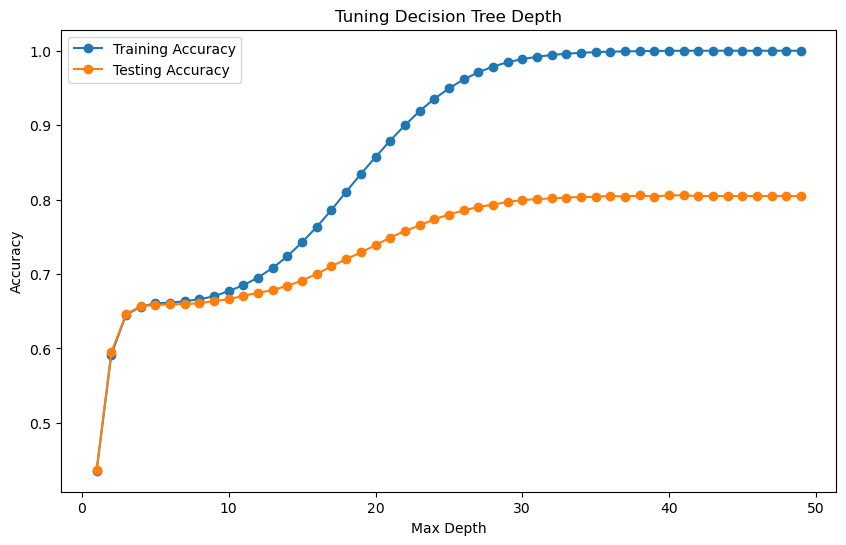

In [141]:
# Plotting the accuracies to visualize
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), train_accuracies, label="Training Accuracy", marker='o')
plt.plot(range(1, 50), test_accuracies, label="Testing Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Tuning Decision Tree Depth")
plt.legend()
plt.show()

#### Top Depths:
- The highest testing accuracy (80.57%) is achieved at depth 40, with similar performance for depths between 35 and 41.
  
#### Training vs. Testing Accuracy:
- Training accuracy approaches 100% at higher depths, indicating overfitting as the tree becomes too complex.
- Testing accuracy improves up to depth 25–40, stabilizing around 80% before slight fluctuations.
  
#### Overfitting Evidence:
- Beyond depth 30, the gap between training and testing accuracy widens, confirming overfitting at deeper levels.
  
#### Visual Insights:
- The plotted accuracies clearly show the tradeoff between underfitting and overfitting

In [144]:
#Cross Validation loop testing max depth between 15-30 for optimal depth

depth_range = range(15, 31)
cv_means = []
cv_stds = []


for depth in depth_range:
    
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    scores = cross_val_score(treeclf, X, y, cv=5, scoring='accuracy')
    
    cv_means.append(np.mean(scores))
    cv_stds.append(np.std(scores))

# Create a DataFrame for better visualization
cv_results = pd.DataFrame({
    'Max Depth': depth_range,
    'Mean CV Accuracy': cv_means,
    'Std CV Accuracy': cv_stds
})

# Display the results
print(cv_results)


    Max Depth  Mean CV Accuracy  Std CV Accuracy
0          15          0.699051         0.024702
1          16          0.709211         0.027320
2          17          0.720402         0.030833
3          18          0.733582         0.034765
4          19          0.745122         0.038384
5          20          0.755998         0.041815
6          21          0.767779         0.044889
7          22          0.778478         0.047302
8          23          0.787815         0.050544
9          24          0.796557         0.052284
10         25          0.803603         0.055439
11         26          0.809733         0.055988
12         27          0.815315         0.057156
13         28          0.819293         0.058697
14         29          0.821640         0.059737
15         30          0.824554         0.060035


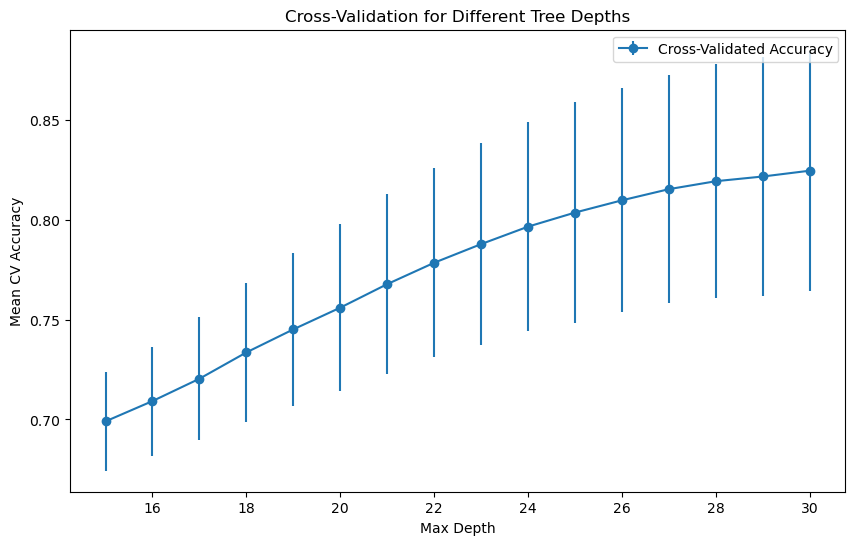

In [146]:
# Visualize the cross-validation scores
plt.figure(figsize=(10, 6))
plt.errorbar(depth_range, cv_means, yerr=cv_stds, fmt='-o', label='Cross-Validated Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Cross-Validation for Different Tree Depths')
plt.legend()
plt.show()

#### Improvement with Depth:
- The mean cross-validated accuracy increases as the maximum depth grows, stabilizing around 30 with a mean accuracy of 82.45%.
  
#### Standard Deviation:
- The standard deviation increases slightly with deeper trees, indicating slight variability in performance across folds.
  
#### Optimal Depth Range:
- By selecting a maximum depth of 25, the model achieves a strong balance between accuracy and stability. This choice avoids unnecessary complexity and variance, ensuring the decision tree remains interpretable while maintaining high performance. The trade-off prioritizes practical implementation over marginal accuracy gains at deeper depths.


### Final Testing Results

In [150]:
#Testing Accuracy on the entire data seet
final_tree_model = DecisionTreeClassifier(max_depth=25, random_state=42)
final_tree_model.fit(X, y)
y_pred_full = final_tree_model.predict(X)
final_accuracy = accuracy_score(y, y_pred_full)
print(f"Final model accuracy on the entire dataset: {final_accuracy:.4f}")


Final model accuracy on the entire dataset: 0.9502


In [152]:
#Testing overall Cross-Validation Accuracy, seems more accurate
cv_scores = cross_val_score(final_tree_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-Validation Accuracy Scores: [0.81786494 0.69388609 0.83858899 0.82776009 0.83991355]
Mean CV Accuracy: 0.8036027334141519
Standard Deviation of CV Accuracy: 0.055438695639736


#### Testing Observations
- High Accuracy on Training Data: Reflects the model's strong fit to the dataset, though this is not a guarantee of generalization.
- Cross-Validation Performance: Achieves a robust average accuracy of 80.36%, indicating the model's ability to generalize well while avoiding unnecessary complexity.
- Balance Between Complexity and Performance: The chosen depth of 25 strikes a balance, ensuring stability across folds without overfitting excessively.

### Conclusion for Decision Tree Model 

The Decision Tree achieved a mean cross-validated accuracy of 80.36% and a training accuracy of 95.02%, reflecting strong performance but some overfitting. A maximum depth of 25 was optimal, balancing accuracy and complexity, as deeper trees offered diminishing returns. Overall, the model effectively classifies grouped IMDb ratings with good generalization and interpretability. Future improvements could include ensemble methods for enhanced stability and performance.

## Comprehensive Project Conclusion

This project aimed to predict IMDb movie ratings by exploring and comparing multiple machine learning models, including Linear Regression, K-Nearest Neighbors (KNN), and Decision Tree Classification. Through careful preprocessing, feature selection, and model tuning, the results demonstrated unique strengths and limitations for each approach, providing a well-rounded understanding of the dataset and predictive modeling techniques.

#### Linear Regression:

The Linear Regression model achieved a training R² of 75.62% and a testing R² of 75.32%, with low RMSE values, indicating strong performance in predicting continuous ratings.
Residuals analysis and scatter plots confirmed a good model fit, with minimal bias and evenly distributed prediction errors.

#### K-Nearest Neighbors (KNN):

By grouping ratings into discrete categories, the KNN classifier achieved a final accuracy of 66.70% on the entire dataset and a mean cross-validated accuracy of 64.88%.
Testing across different K values revealed K=31 as the optimal balance between training and testing error, avoiding overfitting while maintaining strong generalization.

#### Decision Tree Classification:

The Decision Tree model excelled with a final training accuracy of 95.02%(due to possible overfitting) and a mean cross-validated accuracy of 80.36%, effectively balancing complexity and performance.
Depth tuning showed that a maximum depth of 25 provided optimal accuracy while preventing excessive overfitting.
Feature importance analysis confirmed the significance of variables like director_avg_rating and votes in driving predictions, emphasizing the model's interpretability.


#### Overall Insights:

Each model contributed valuable insights into the data and the task of rating prediction:

Linear Regression provided a strong baseline for continuous prediction and highlighted key relationships among features,
KNN offered a more flexible approach for categorical classification and Decision Trees combined high accuracy with interpretability, making them an effective choice for capturing non-linear relationships and explaining predictions.
